# ECE381V HW2- Mingyo Seo (EID: ms84662)

## Question 1

We use the Lagrangian function,
<br>
$\mathcal{L} (x, \lambda, \mu) = -\sum_{i=1}^{n} \log{\left( \alpha_i + x_i \right)} + \lambda (1^\top {x} -1)  + \mu^\top (-{x}) $
<br>
where $\lambda \in \mathbb{R}$ and $\mu_i \geq 0$.

By applying $\nabla_{xx} \mathcal{L} (z, \lambda, \mu) =  0 $ at the sufficient conditions of optimality for constrained convex optimization problems, we can get
<br>
$\lambda^* = \mu^* + {1\over{x_i^* + \alpha_i}}$.
<br>

By applying complementary slckness
<br>
$
\mu_i^* (-x_i^*) = 0 \quad \forall i
$,
<br>
the optimal solution is given as,
<br>
$
\lambda^* = 
\begin{cases}
{1\over{x_i^* + \alpha_i}} & x_i^* \neq 0\\
\mu_i^* + {1\over{\alpha_i}} & x_i^* = 0
\end{cases}$.
<br>
(More details of the process of computing the optimiality, refer the lecture note.)

In the context of the water-filling problem, $\alpha$ is interpreted as the natural water level. $x^*$ is the amount of filling water at the optimal actions. $\lambda^*$ is the degree of the enoughness of water.
The optimal water-filling solution $x_i^*$ is the amount of difference between ${1\over{\lambda_i^*}}-\alpha_i$, as presented in the below plot.
The first case of $\lambda^*$ at $x_i^* \neq 0$ implies that 
the natural water level is low $\alpha_i < {1\over{\lambda_i^*}}$ and water need to be filled $x_i^* > 0$. The second case of $\lambda^*$ at $x_i^* = 0$ implies that 
the natural water level is high enough $\alpha_i > {1\over{\lambda_i^*}}$ and there is no water filling $x_i^* =0$.


The optimal actions of the water-filling problem can be computed by the below CVXPY script.

Problem status: optimal
Optimal objective = 0.8202 
Optimal action:
[2.880e-08 2.333e-01 1.148e-08 4.333e-01 3.333e-01]
Lambda values:
[0.833 0.882 0.769 0.882 0.882]


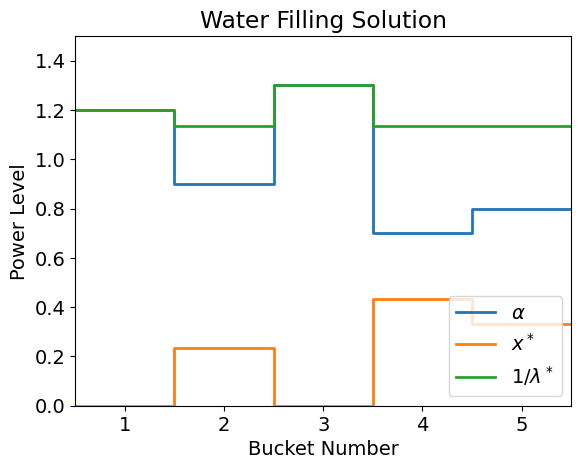

In [23]:
import numpy as np
import cvxpy as cp

import matplotlib
import matplotlib.pylab as plt

np.set_printoptions(precision=3)
matplotlib.rcParams.update({'font.size': 14})

# Solve the water filling problem of n buckets, each different α, and sum c.
def water_filling(n, a, c):

    # Declare variables and parameters
    x = cp.Variable(shape=n)
    alpha = cp.Parameter(n, nonneg=True)
    alpha.value = a

    # Choose objective function. Interpret as maximising the total communication rate of all the channels
    obj = cp.Maximize(cp.sum(cp.log(alpha + x)))

    # Declare constraints
    constraints = [x >= 0, cp.sum(x) - c == 0]

    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan
    
# Run scripts for Q1
buckets = 5
c = 1
alpha = np.array([1.2, 0.9, 1.3, 0.7, 0.8])

stat, value, x = water_filling(buckets, alpha, c)
l = 1/(alpha + x)
print('Problem status: {}'.format(stat))
print('Optimal objective = {:.4g} '.format(value))
print('Optimal action:\n{}'.format(x))
print('Lambda values:\n{}'.format(l))

X = x.copy()
L = l.copy()

# to include the last data point as a step, we need to repeat it
A = np.concatenate((alpha,[alpha[-1]]))
X = np.concatenate((X,[X[-1]]))
L = np.concatenate((L,[L[-1]]))

axis = np.arange(0.5,buckets+1.5,1)
index = axis+0.5
plt.xticks(index)
plt.xlim(0.5,buckets+0.5)
plt.ylim(0,1.5)
plt.step(axis,A,where='post',label =r'$\alpha$',lw=2)
plt.step(axis,X,where='post',label =r'$x^*$',lw=2)
plt.step(axis,1/L,where='post',label=r'$1/\lambda^*$',lw=2)
plt.legend(loc='lower right')
plt.xlabel('Bucket Number')
plt.ylabel('Power Level')
plt.title('Water Filling Solution')
plt.show()